# Google Play Store: underserved markets/categories

The indicators chosen to identify an underserved market or category are subject to the following assumtions:

    - categories with a higher rating regardles of the volume of apps in that category
      could be said to be underserved the quality and execution. only apps with more than 100k installs will be
      considered in our calculations. 
    
    - Ratings are out of 5 and is a composite of positive to negative reviews. the rating calculation iteself has been 
      done prior to being entered into the data thus we will operate on the assumption that above 2.5 is more positive
      than negative and anything less than 2.5 is negative 


    - in a given category, a comparison of the average rating between free and paid apps could indicate 
      weather underservice is due to lack of market willingness to pay the average price, or lack of overall quality in the category. 
    
    - in relation to the free:paid average rating; the assumtion here is that free apps will overall have a generally 
      lower quality than paid apps and that if paid apps in the category have a lower review ratio than free apps in the same category, 
      it could be inferred that the market is not as willing to pay the average price for an application in that category in spite
      of it's assumed superior quality. 
    

with these assumtions in mind we will explore the overall comparison among all categories between the review ratio of paid to free applications.   


In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from csv_formatter import pull_comma, pull_denom, pull_currency 

g_play = pd.read_csv('data-csv/googleplaystore.csv')
g_play_df = pd.DataFrame(g_play.copy().drop(['Size', 'Last Updated', 'Current Ver', 'Android Ver', 'Content Rating'], axis=1))
g_play_df['Reviews'].replace(g_play_df['Reviews'].values, [pd.to_numeric(pull_denom(pull_comma(val))) for val in g_play_df['Reviews']], inplace=True)
g_play_df['Installs'].replace(g_play_df['Installs'].values, [pd.to_numeric(pull_denom(pull_comma(val)), errors='coerce') for val in g_play_df['Installs']], inplace=True)
g_play_df['Price'].replace(g_play_df['Price'].values, [pd.to_numeric(val, errors='coerce') for val in g_play_df['Price']], inplace=True)

# g_play_df.head()

In [2]:
free_df = g_play_df[g_play_df['Type'] == 'Free']
paid_df = g_play_df[g_play_df['Type'] == 'Paid']

free_rate = free_df['Rating'].mean()
paid_rate = paid_df['Rating'].mean()

# print(f'\n average rating of free apps: {free_rate} \n average rating of paid apps: {paid_rate}')

In [3]:
cat_free_rate = free_df.groupby('Category')['Rating'].mean()
cat_paid_rate = paid_df.groupby('Category')['Rating'].mean().dropna()
# print(f'\n free app mean rating by category: {cat_free_rate} \n paid app mean rating by category {cat_paid_rate}')

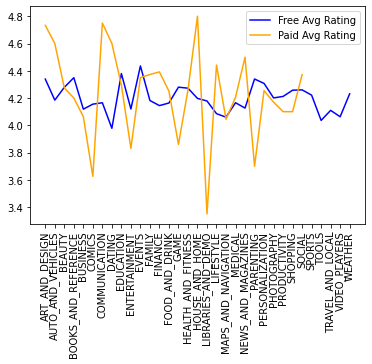

In [4]:
fig, ax = plt.subplots()
x_free = cat_free_rate.values
x_paid = cat_paid_rate.values
cat_group = cat_free_rate.index
plt.plot(cat_group, x_free, label='Free Avg Rating', color='blue')
plt.plot(x_paid, label='Paid Avg Rating', color='orange')
ax.set_xticklabels(cat_group, rotation=90)
plt.legend()
plt.show
print()

### Conclusions

Based on our earlier assumptions it would seem that the categories: 'Libraries-and-Demo', 'Parenting', and 'Comics' are underserved by the paid app market. 
'News', 'Communication', 'Dating', 'Health and Fitness' and as well as 'Social' categories seem to better serve the market as paid apps. 
